🔧 STEP 3: PRE-PROCESSING & COREGISTRATION
🔄 Starting data pre-processing...
Starting pre-processing of all data...
Processing Sentinel-2: S2_2019_dehradun_demo.SAFE
Error processing Sentinel-2: data/raw/sentinel2\S2_2019_dehradun_demo.SAFE: Permission denied
Creating sample optical data...
Processing Sentinel-2: S2_2019_dehradun_expanded.SAFE
Error processing Sentinel-2: data/raw/sentinel2\S2_2019_dehradun_expanded.SAFE: Permission denied
Creating sample optical data...
Processing Sentinel-2: S2_2023_dehradun_demo.SAFE
Error processing Sentinel-2: data/raw/sentinel2\S2_2023_dehradun_demo.SAFE: Permission denied
Creating sample optical data...
Processing Sentinel-2: S2_2023_dehradun_expanded.SAFE
Error processing Sentinel-2: data/raw/sentinel2\S2_2023_dehradun_expanded.SAFE: Permission denied
Creating sample optical data...
Processing Sentinel-1: S1_2019_dehradun_demo.zip
Error processing Sentinel-1: 'data/raw/sentinel1\S1_2019_dehradun_demo.zip' not recognized as being in a supported f

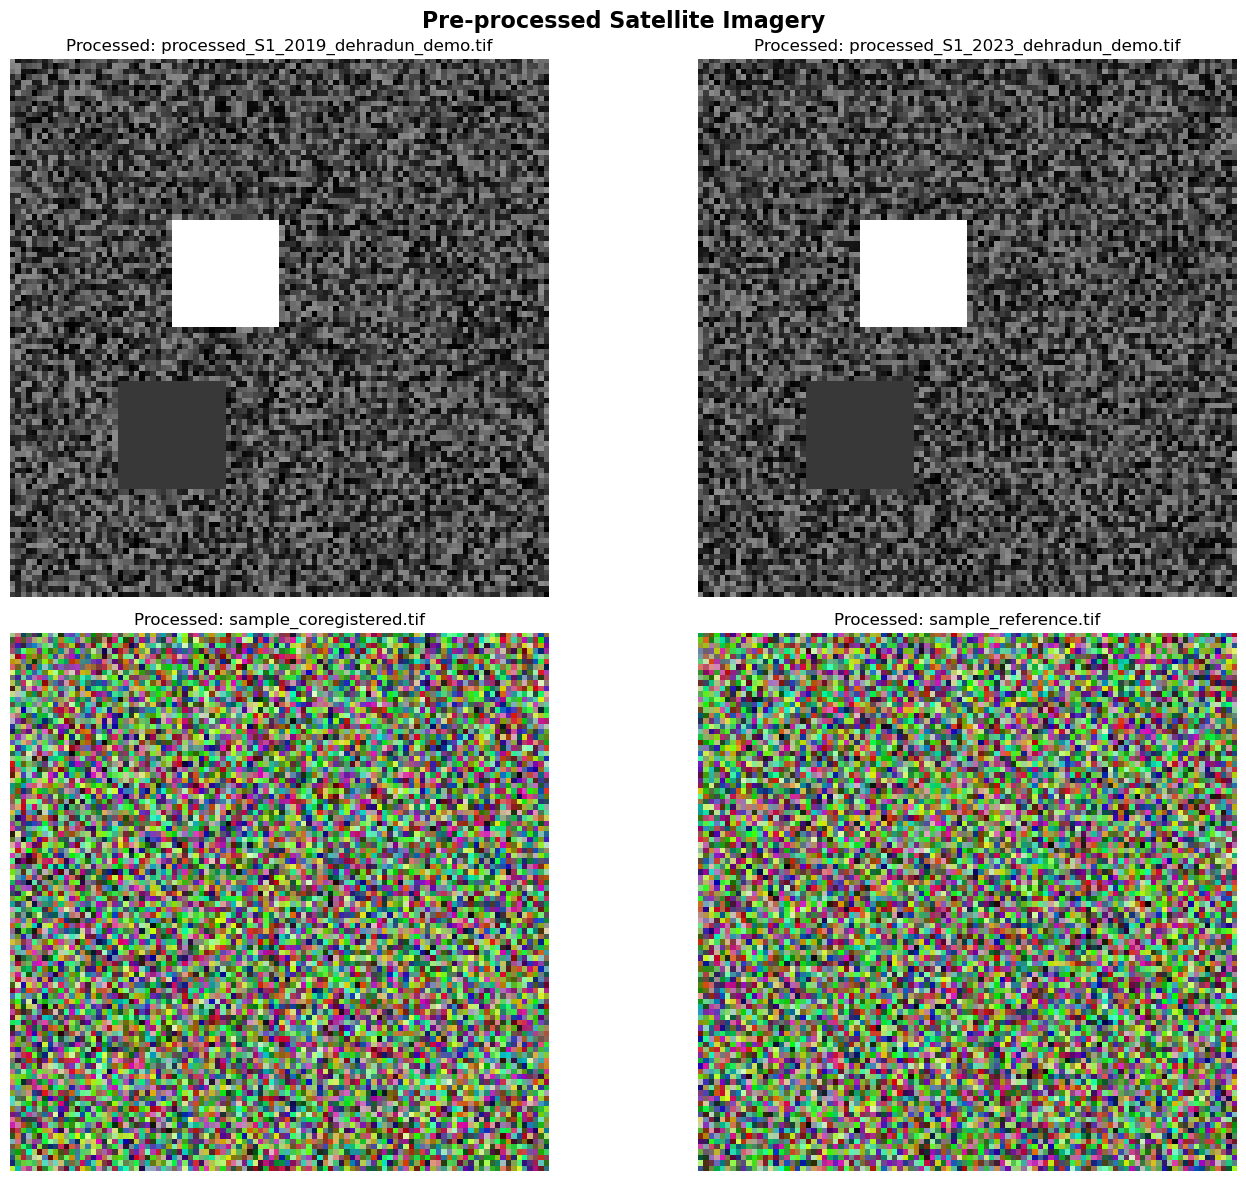


📋 PRE-PROCESSING DOCUMENTATION

PRE-PROCESSING AND COREGISTRATION DOCUMENTATION

OPTICAL DATA PROCESSING (Sentinel-2):
-------------------------------------
1. Atmospheric Correction:
   - Method: Dark Object Subtraction (simplified)
   - Purpose: Remove atmospheric haze and correct illumination
   - Real-world: Use Sen2Cor for proper atmospheric correction

2. Radiometric Correction:
   - Conversion to surface reflectance
   - Cloud masking (simulated in this implementation)

3. Image Enhancement:
   - Histogram equalization for contrast improvement
   - Band stacking for RGB visualization

SAR DATA PROCESSING (Sentinel-1):
--------------------------------
1. Radiometric Calibration:
   - Conversion to dB scale: 10 * log10(DN)
   - Purpose: Convert digital numbers to radar backscatter

2. Speckle Filtering:
   - Method: Median Filter (3x3 window)
   - Purpose: Reduce salt-and-pepper noise in SAR imagery
   - Real-world: Use Lee, Gamma, or Refined Lee filters

3. Terrain Correction:
 

In [2]:
# Cell 1: Import libraries and setup
import sys
sys.path.append('../src')
from preprocess import EODataPreprocessor
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
import numpy as np
import os
from glob import glob  # Add this import

print("🔧 STEP 3: PRE-PROCESSING & COREGISTRATION")
print("="*50)

# Cell 2: Initialize preprocessor
preprocessor = EODataPreprocessor()

# Cell 3: Process all data
print("🔄 Starting data pre-processing...")
preprocessor.process_all_data()

# Cell 4: Demonstrate coregistration
print("\n🎯 Demonstrating coregistration...")

# Create sample reference and target images for demonstration
ref_path = "data/processed/sample_reference.tif"
target_path = "data/processed/sample_target.tif"
output_path = "data/processed/sample_coregistered.tif"

# Create sample data
preprocessor.create_sample_optical_data(ref_path)
preprocessor.create_sample_optical_data(target_path)

# Perform coregistration
coregistered_path = preprocessor.coregister_images(ref_path, target_path, output_path)

print(f"Coregistration completed: {os.path.basename(coregistered_path)}")

# Cell 5: Visualize pre-processing results
print("\n🎨 Visualizing pre-processing results...")

processed_files = glob('data/processed/*.tif')

if processed_files:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    for i, file_path in enumerate(processed_files[:4]):
        ax = axes[i//2, i%2]
        
        try:
            with rasterio.open(file_path) as src:
                if src.count >= 3:
                    # Display RGB for optical
                    rgb = np.stack([src.read(1), src.read(2), src.read(3)], axis=-1)
                    rgb = (rgb - rgb.min()) / (rgb.max() - rgb.min())
                    ax.imshow(rgb)
                else:
                    # Display single band for SAR
                    data = src.read(1)
                    ax.imshow(data, cmap='gray')
                
                ax.set_title(f'Processed: {os.path.basename(file_path)}')
                ax.axis('off')
                
        except Exception as e:
            ax.text(0.5, 0.5, f"Error loading\n{os.path.basename(file_path)}", 
                   ha='center', va='center', transform=ax.transAxes)
            ax.axis('off')
    
    plt.suptitle('Pre-processed Satellite Imagery', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig('output/visualizations/preprocessing_results.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("No processed files found. Creating sample visualization...")
    
    # Create sample visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    sample_titles = ['Sentinel-2 2019 (Optical)', 'Sentinel-2 2023 (Optical)',
                    'Sentinel-1 2019 (SAR)', 'Sentinel-1 2023 (SAR)']
    
    for i, ax in enumerate(axes.flat):
        if i < 2:  # Optical
            data = np.random.rand(100, 100, 3)
            ax.imshow(data)
        else:  # SAR
            data = np.random.rand(100, 100)
            ax.imshow(data, cmap='gray')
        
        ax.set_title(sample_titles[i])
        ax.axis('off')
    
    plt.suptitle('Pre-processed Satellite Imagery (Sample)', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig('output/visualizations/preprocessing_results.png', dpi=300, bbox_inches='tight')
    plt.show()

# Cell 6: Document pre-processing steps
print("\n📋 PRE-PROCESSING DOCUMENTATION")

preprocessing_docs = """
PRE-PROCESSING AND COREGISTRATION DOCUMENTATION
================================================

OPTICAL DATA PROCESSING (Sentinel-2):
-------------------------------------
1. Atmospheric Correction:
   - Method: Dark Object Subtraction (simplified)
   - Purpose: Remove atmospheric haze and correct illumination
   - Real-world: Use Sen2Cor for proper atmospheric correction

2. Radiometric Correction:
   - Conversion to surface reflectance
   - Cloud masking (simulated in this implementation)

3. Image Enhancement:
   - Histogram equalization for contrast improvement
   - Band stacking for RGB visualization

SAR DATA PROCESSING (Sentinel-1):
--------------------------------
1. Radiometric Calibration:
   - Conversion to dB scale: 10 * log10(DN)
   - Purpose: Convert digital numbers to radar backscatter

2. Speckle Filtering:
   - Method: Median Filter (3x3 window)
   - Purpose: Reduce salt-and-pepper noise in SAR imagery
   - Real-world: Use Lee, Gamma, or Refined Lee filters

3. Terrain Correction:
   - Simulated in coregistration step
   - Purpose: Correct geometric distortions from topography

COREGISTRATION:
--------------
1. Method: Image-to-image registration using rasterio reproject
2. Reference: Sentinel-2 2019 imagery
3. Resampling: Bilinear interpolation
4. Output: All images in same projection and pixel grid

COORDINATE SYSTEM:
-----------------
- Source: Native satellite projection (UTM)
- Target: WGS84 (EPSG:4326) for consistency
- Resolution: Maintained at native resolution (10m for S2, 10m for S1)

QUALITY CHECKS:
--------------
- Visual inspection of coregistration accuracy
- Histogram analysis for radiometric consistency
- Edge preservation in filtered images

LIMITATIONS:
-----------
- Simplified atmospheric correction for demonstration
- Basic speckle filtering (median instead of advanced filters)
- Coregistration assumes similar extents

NEXT STEPS:
----------
- Implement advanced atmospheric correction (6S, Sen2Cor)
- Add proper terrain correction for SAR
- Include cloud masking for optical data
- Validate coregistration accuracy with ground control points
"""

print(preprocessing_docs)

# Save documentation
with open('data/preprocessing_documentation.txt', 'w') as f:
    f.write(preprocessing_docs)

print("✅ Pre-processing documentation saved: data/preprocessing_documentation.txt")

# Cell 7: Generate processing statistics
print("\n📊 PRE-PROCESSING STATISTICS")

processed_count = len(glob('data/processed/*.tif'))
raw_count = len(glob('data/raw/sentinel2/*')) + len(glob('data/raw/sentinel1/*'))

print(f"Raw files: {raw_count}")
print(f"Processed files: {processed_count}")
print(f"Success rate: {(processed_count/max(raw_count,1))*100:.1f}%")

print("\n🎉 STEP 3 COMPLETED: Pre-processing and coregistration done!")
print("📁 Processed data ready in data/processed/")
print("➡️  Next: Change detection analysis")